In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import geopandas as gpd

idx = pd.IndexSlice

scenario = "FS"
ll = "historic"

data = pd.read_csv(
    Path.cwd().parent / 
    "results" / 
    "pypsa-fes" /
    "csvs" /
    # "flex_statistics_combined.csv",
    "flex_statistics.csv",
    index_col=[0,1],
    header=[0,1,2,3,4]
    )
data.columns = data.columns.droplevel([0,1,3])

cols = data.columns.to_frame()
cols.loc[cols["flexopts"].str.contains("Unnamed"), "flexopts"] = "no flex"

data.columns = pd.MultiIndex.from_frame(cols)

data = data.loc[:, idx[["no flex", "int-tank-ss-v2g"]]]

c1 = "#FF0659"
c2 = "#008BFB"

intermittent = pd.Index(["solar", "onwind", "offwind-ac", "offwind-dc"])
conventional = pd.Index(["OCGT", "CCGT", "nuclear", "biomass", "allam"])

data

flexopts                            no flex                             \
year                                   2025         2030          2035   
GB0 Z10 OCGT_energy                0.000000     0.000000  0.000000e+00   
        CCGT_energy                0.000000     0.000000  0.000000e+00   
        allam_energy              13.026564  6128.767021  1.228101e+06   
        nuclear_energy             0.000000     0.000000  0.000000e+00   
        modular nuclear_energy     0.000000     0.000000  0.000000e+00   
...                                     ...          ...           ...   
GB0 Z9  OCGT_p_nom                80.668730    47.674690  1.576104e+01   
        CCGT_p_nom              4802.094284  2838.006183  9.382320e+02   
        allam_p_nom                0.003270     0.756643  1.306152e+03   
        nuclear_p_nom              0.000000     0.000000  0.000000e+00   
        biomass_p_nom            412.400000   412.400000  4.124000e+02   

flexopts                                                                  \
year                                    2040          2045          2050   
GB0 Z10 OCGT_energy                 0.000000  0.000000e+00  0.000000e+00   
        CCGT_energy                 0.000000  0.000000e+00  0.000000e+00   
        allam_energy            58886.220834  5.624554e+06  2.972524e+06   
        nuclear_energy              0.000000  0.000000e+00  0.000000e+00   
        modular nuclear_energy      0.000000  0.000000e+00  0.000000e+00   
...                                      ...           ...           ...   
GB0 Z9  OCGT_p_nom                  0.000000  0.000000e+00  0.000000e+00   
        CCGT_p_nom                  0.000000  0.000000e+00  0.000000e+00   
        allam_p_nom              2236.453162  2.028672e+03  1.336997e+03   
        nuclear_p_nom               0.000000  0.000000e+00  0.000000e+00   
        biomass_p_nom             412.400000  4.124000e+02  4.124000e+02   

flexopts                       int-tank-ss-v2g                            \
year                                      2025         2030         2035   
GB0 Z10 OCGT_energy                   0.000000     0.000000     0.000000   
        CCGT_energy                   0.000000     0.000000     0.000000   
        allam_energy                  8.628226     7.362551  1019.853238   
        nuclear_energy                0.000000     0.000000     0.000000   
        modular nuclear_energy        0.000000     0.000000     0.000000   
...                                        ...          ...          ...   
GB0 Z9  OCGT_p_nom                   80.668730    47.674690    15.761037   
        CCGT_p_nom                 4802.094284  2838.006183   938.232034   
        allam_p_nom                   0.002335     0.002402     0.089854   
        nuclear_p_nom                 0.000000     0.000000     0.000000   
        biomass_p_nom               412.400000   412.400000   412.400000   

flexopts                                                                    
year                                     2040           2045          2050  
GB0 Z10 OCGT_energy                  0.000000       0.000000      0.000000  
        CCGT_energy                  0.000000       0.000000      0.000000  
        allam_energy            317423.337093  178014.428719  90063.798646  
        nuclear_energy               0.000000       0.000000      0.000000  
        modular nuclear_energy       0.000000       0.000000      0.000000  
...                                       ...            ...           ...  
GB0 Z9  OCGT_p_nom                   0.000000       0.000000      0.000000  
        CCGT_p_nom                   0.000000       0.000000      0.000000  
        allam_p_nom                 32.218536     548.772346    858.280730  
        nuclear_p_nom                0.000000       0.000000      0.000000  
        biomass_p_nom              412.400000     412.400000    412.400000  

[459 rows x 12 columns]

In [ ]:
data

In [2]:
import pypsa


base = Path.cwd().parent / "results" / "pypsa-fes" / "networks"
fn = "elec_s_ec_l{}__{}_{}_{}.nc"

def get_total_system_cost(flex, year):
    if flex == "no flex": flex = ""
    return pypsa.Network(base / fn.format(ll, flex, scenario, year)).objective


print(get_total_system_cost("", 2040))
print(get_total_system_cost("int-tank-ss-v2g", 2040))

INFO:pypsa.io:Imported network elec_s_ec_lhnd___LW_2040.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


54459953442.92096


INFO:pypsa.io:Imported network elec_s_ec_lhnd__int-tank-ss-v2g_LW_2040.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


48406640379.36401


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

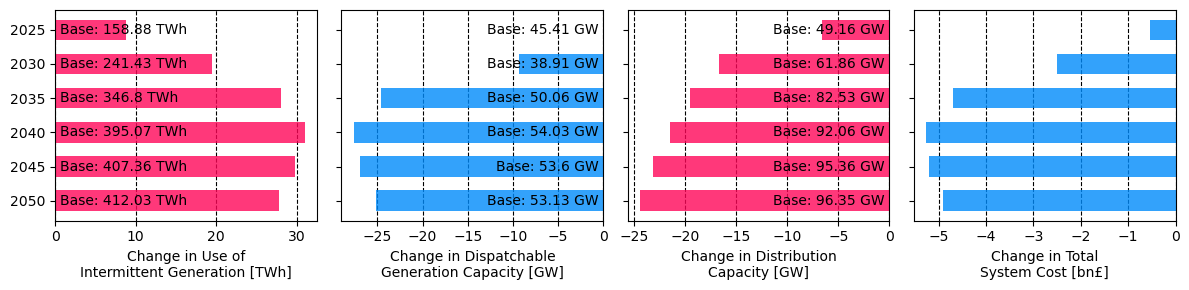

In [3]:
from itertools import cycle

fig, axs = plt.subplots(1, 4, figsize=(12, 3))

barh_kwargs = {
    "height": 0.6,
    "alpha": 0.8,
}

indexes = {
    "int": intermittent+"_energy",
    "cap": conventional+"_p_nom",
    # "tra": "transmission_s_nom",
    "tra": "transmission_s_nom",
    "dis": "distribution_p_nom",
}

plotted_quants = ["int", "cap", "dis", "cos"]
for ax, name, color in zip(axs, plotted_quants, cycle([c1, c2])):

    df = data.groupby(level=1).sum()

    if name == 'int': fac = 1e-6
    elif name == 'cos': fac = 1e-9
    else: fac = 1e-3

    if name in ["int", "cap"]:
        df = df.loc[indexes[name]].sum()
    elif name == 'cos':
        df = df.apply(lambda x: get_total_system_cost(*x.name), axis=0).mul(1/1.15)
    else:
        df = df.loc[indexes[name]]
    
    df = df.mul(fac)

    widths = []
    ls = []
    bases = []

    for year in sorted(df.index.get_level_values(1).unique().astype(int))[::-1]:
        year = str(year)
        year_df = df.loc[idx[:, year]]

        l, r = year_df.min(), year_df.max()
        width = r - l
        widths.append(width)
        ls.append(l)
        bases.append(year_df.loc["no flex"])


    for year in sorted(df.index.get_level_values(1).unique().astype(int))[::-1]:

        year = str(year)
    
        year_df = df.loc[idx[:, year]]
        
        l, r = year_df.min(), year_df.max()
        width = r - l

        if name == "int":
            ax.barh(year, width, color=color, **barh_kwargs)
        
        else:
            ax.barh(year, -width, color=color, **barh_kwargs)


    for (i, year), w in zip(enumerate(sorted(df.index.get_level_values(1).unique().astype(int))[::-1]), widths):

        if name == "int": 
            ha = "left"
            mul = 1.
            unit = "TWh"
        elif name == "cos":
            continue
        else:
            ha = "right"
            mul = -1.
            unit = "GW"

        year = str(year)
        ax.text(
            mul * max(widths)*0.02,
            year,
            f"Base: {np.around(bases[i], decimals=2)} {unit}",
            va='center',
            ha=ha, 
            )

for ax in axs[1:]:
    ax.set_yticklabels("")

for ax in axs:
    ax.grid(axis="x", linestyle="dashed", color="k")
    ax.set_axisbelow(True)

ylabels = {
    'int': "Change in Use of\nIntermittent Generation [TWh]",
    'cap': "Change in Dispatchable\nGeneration Capacity [GW]",
    'tra': "Change in Transmission\nCapacity [GW]",
    'dis': "Change in Distribution\nCapacity [GW]",
    'cos': "Change in Total\nSystem Cost [bn£]"
}

for ax, l in zip(axs, plotted_quants):
    ax.set_xlabel(ylabels[l])

plt.tight_layout()

plt.savefig("whole_system_change.pdf")
plt.show()

In [4]:
df.iloc[:,0]

# run apply on columns
# df.groupby(level=1).sum().loc[indexes["int"]].sum()
df.apply(lambda x: get_total_system_cost(*x.name), axis=0)

IndexingError: Too many indexers

In [ ]:
# check if all networks max out allowed network cost
import pypsa
import pandas as pd
import numpy as np
from pathlib import Path

all_flex_types = [
    "int-tank-ss-v2g",
    "go-tank-ss-v2g",
    "int-cosy-ss-v2g",
    "int-tank-v2g",
    "int-tank-ss",
    "tank-ss",
    "int-ss-v2g",
    "",
    "ss",
    "go",
    "int",
    "cosy",
    "tank",
    "int-v2g",
]

year = "2035"

In [ ]:
file = "elec_s_ec_lhnd__{}_LW_{}.nc"

gb_values = []
non_gb_values = []
total_values = []

for flex in all_flex_types:

    n = pypsa.Network(Path.cwd().parent / "results" / "pypsa-fes" / "networks" / file.format(flex, year))
    
    gb_mask = n.lines.bus0.str.contains("GB")

    gb_values.append(n.lines.loc[gb_mask, "s_nom_opt"] @ n.lines.loc[gb_mask, "capital_cost"])
    non_gb_values.append(n.lines.loc[~gb_mask, "s_nom_opt"] @ n.lines.loc[~gb_mask, "capital_cost"])
    total_values.append(n.lines["s_nom_opt"] @ n.lines["capital_cost"])


    # print(f"flex {flex}: {gb_value} {non_gb_value} {value}")

results = pd.DataFrame(
    data={
        "gb": gb_values,
        "non_gb": non_gb_values,
        "total": total_values,
    },
    index=all_flex_types,
)

print(results)


INFO:pypsa.io:Imported network elec_s_ec_lhnd__int-tank-ss-v2g_LW_2035.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_ec_lhnd__go-tank-ss-v2g_LW_2035.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_ec_lhnd__int-cosy-ss-v2g_LW_2035.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_ec_lhnd__int-tank-v2g_LW_2035.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_ec_lhnd__int-tank-ss_LW_2035.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_ec_lhnd__tank-ss_LW_2035.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, sto

                           gb        non_gb         total
int-tank-ss-v2g  9.360900e+08  1.288824e+09  2.224914e+09
go-tank-ss-v2g   9.495168e+08  1.288824e+09  2.238341e+09
int-cosy-ss-v2g  8.882992e+08  1.288885e+09  2.177184e+09
int-tank-v2g     9.347509e+08  1.288718e+09  2.223469e+09
int-tank-ss      9.005901e+08  1.288828e+09  2.189418e+09
tank-ss          9.026276e+08  1.288699e+09  2.191326e+09
int-ss-v2g       8.886748e+08  1.288828e+09  2.177503e+09
                 9.380386e+08  1.288747e+09  2.226786e+09
ss               9.397207e+08  1.288858e+09  2.228578e+09
go               8.874393e+08  1.288817e+09  2.176257e+09
int              8.634847e+08  1.288817e+09  2.152302e+09
cosy             9.550350e+08  1.288817e+09  2.243852e+09
tank             9.032613e+08  1.288791e+09  2.192052e+09
int-v2g          8.891244e+08  1.288801e+09  2.177925e+09


<AxesSubplot:>

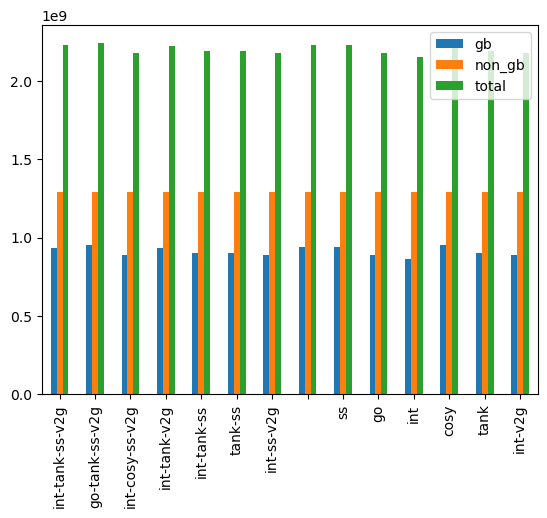

In [9]:
results.plot.bar()

In [31]:
import pypsa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [56]:
n1 = pypsa.Network(Path.cwd().parent / "results" / "pypsa-fes" / "networks" / "elec_s_ec_lhnd__int-tank-ss-v2g_LW_2050.nc")
n2 = pypsa.Network(Path.cwd().parent / "results" / "pypsa-fes" / "networks" / "elec_s_ec_lhnd__int-tank-ss-v2g_LW_2040_ev_1.0_heat_1.0.nc")

INFO:pypsa.io:Imported network elec_s_ec_lhnd__int-tank-ss-v2g_LW_2050.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_ec_lhnd__int-tank-ss-v2g_LW_2040_ev_1.0_heat_1.0.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [57]:
buses = pd.Index(n1.links.loc[n1.links.carrier == "electricity distribution grid", "bus0"])

In [59]:
c = 'generators'
print(getattr(n2, c).index.difference(getattr(n1, c)))


Index(['BE1 0 CCGT', 'BE1 0 OCGT', 'BE1 0 biomass', 'BE1 0 nuclear',
       'BE1 0 offwind-ac', 'BE1 0 offwind-dc', 'BE1 0 oil', 'BE1 0 onwind',
       'BE1 0 ror', 'BE1 0 solar',
       ...
       'SE2 0 CCGT', 'SE2 0 OCGT', 'SE2 0 biomass', 'SE2 0 nuclear',
       'SE2 0 offwind-ac', 'SE2 0 offwind-dc', 'SE2 0 onwind', 'SE2 0 ror',
       'SE2 0 solar', 'winter event flexibility'],
      dtype='object', name='Generator', length=181)


In [64]:
c = "lines"
print(getattr(n1, c).shape)
print(getattr(n2, c).shape)

(37, 31)
(37, 31)


In [ ]:

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

n1.stores_t


plt.show()

In [65]:
n1.generators.loc[n1.generators.carrier == "onwind"]

,carrier,bus,p_nom_min,p_nom,p_nom_extendable,efficiency,marginal_cost,capital_cost,p_nom_max,p_max_pu,...,shut_down_cost,stand_by_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
Generator,,,,,,,,,,,,,,,,,,,,,
BE1 0 onwind,onwind,BE1 0,2437.820000,2437.820000,True,1.0,0.024814,96085.88802,15476.765363,1.0,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
DE1 0 onwind,onwind,DE1 0,54365.146453,54365.146453,True,1.0,0.025510,96085.88802,489111.528464,1.0,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
DK1 0 onwind,onwind,DK1 0,3755.233214,3755.233214,True,1.0,0.024673,96085.88802,61813.047993,1.0,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
DK2 0 onwind,onwind,DK2 0,778.926786,778.926786,True,1.0,0.024235,96085.88802,11610.066123,1.0,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
FR1 0 onwind,onwind,FR1 0,17379.497130,17379.497130,True,1.0,0.024556,96085.88802,970381.285794,1.0,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
GB0 Z10 onwind,onwind,GB0 Z10,504.081820,504.081820,True,1.0,0.025086,96085.88802,14534.159487,1.0,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
GB0 Z11 onwind,onwind,GB0 Z11,901.224690,901.224690,True,1.0,0.025824,96085.88802,29888.770085,1.0,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
GB0 Z12 onwind,onwind,GB0 Z12,1160.109046,1160.109046,True,1.0,0.025556,96085.88802,33980.346994,1.0,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
GB0 Z13 onwind,onwind,GB0 Z13,1501.310407,1501.310407,True,1.0,0.024930,96085.88802,47054.138609,1.0,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
